In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[24999]) 
print(train_data.shape)
print(train_labels[24999])
print(train_labels.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]
(25000,)
0
(25000,)


In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
        return results
    
sequences = [
    [1,3,5],
    [0,2,3],
    [2,4]
]
vectorized_data = vectorize_sequences(sequences, dimension=6)
print(vectorized_data)

[[0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [11]:
# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[24999])
print(x_train.shape)

# also vectorize your labels (convert into a NumPy array)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[24999])
print(y_test[24999])

[0. 0. 0. ... 0. 0. 0.]
(25000, 10000)
0.0
0.0


In [12]:
# Keras model implementation
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compiling the model by configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Setting aside a validation data
x_val = x_train[:10000] #  takes the first 10,000 rows from x_train
print(x_train.shape)
print(x_val.shape)

partial_x_train = x_train[10000:]
print(partial_x_train.shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(y_val.shape)
print(partial_y_train.shape)

(25000, 10000)
(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


In [23]:
# Training the model
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512, # batch size can be chosen for any power of 2
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5034 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5030 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss: 0.6933
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.4948 - val_loss

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

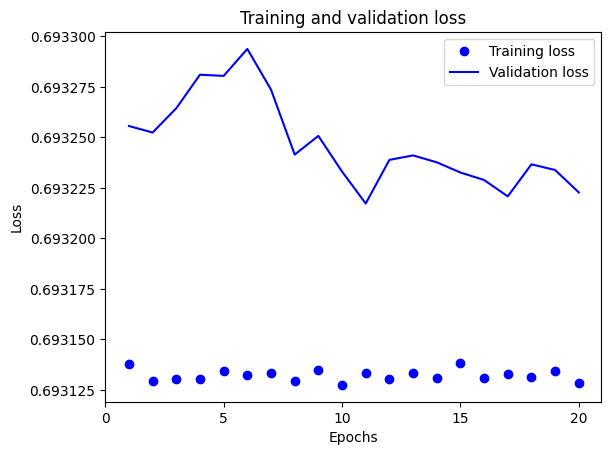

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Setting the x-ticks to integers and adding breaks at every 5 epochs
plt.xticks(range(0, len(loss_values) + 1, 5))  # Adjust the step size to 5

plt.show()

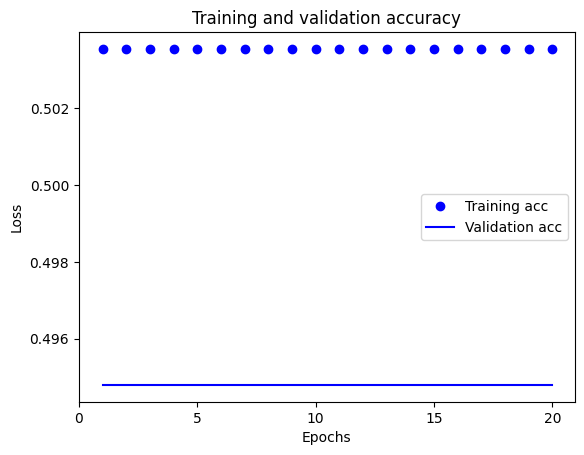

In [26]:
# Plotting the training and validation accuracy
plt.clf() # clear the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Setting the x-ticks to integers and adding breaks at every 5 epochs
plt.xticks(range(0, len(loss_values) + 1, 5))  # Adjust the step size to 5

plt.show()

In [27]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512) # batch size can be chosen for any power of 2

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5036 - loss: 0.6932
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5029 - loss: 0.6931
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 0.6932
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5027 - loss: 0.6931
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5012 - loss: 0.6932
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5073 - loss: 0.6931
[0.6931465864181519, 0.5]
